In [1]:
%matplotlib inline
from IPython.display import Image
from IPython.display import display

import os, itertools, csv
import numpy as np
import matplotlib
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from lib import *

In [2]:
matplotlib.rcParams.update({'font.size': 10})
plt = matplotlib.pyplot
if not os.path.exists("output_HW/") : os.mkdir("output_HW/")

## 1. Data Exploring
首先讀取dataset。

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                 'mushroom/agaricus-lepiota.data', header=None, engine='python')
column_name = ['classes','cap-shape', 'cap-surface','cap-color','bruises?','odor',
               'gill-attachment','gill-spacing','gill-size','gill-color',
               'stalk-shape','stalk-root','stalk-surface-above-ring',
               'stalk-surface-below-ring','stalk-color-above-ring',
               'stalk-color-below-ring','veil-type','veil-color','ring-number',
               'ring-type','spore-print-color','population','habitat']
df.columns = column_name
df.head()

,classes,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.tail()

,classes,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


接著我們要檢查是否有Null或NaN在dataset中。

In [5]:
display(df.isnull().sum())

classes                     0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
display(df.isna().sum())

classes                     0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

可見看起來並沒有。但預防萬一，或許他是打問號或著寫unknown之類的也說不定。因此我們要更仔細的檢查。

In [7]:
df.columns

Index(['classes', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [8]:
for feature in df.columns.values:
    print(feature, ': ', np.unique(df[feature]))

classes :  ['e' 'p']
cap-shape :  ['b' 'c' 'f' 'k' 's' 'x']
cap-surface :  ['f' 'g' 's' 'y']
cap-color :  ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises? :  ['f' 't']
odor :  ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment :  ['a' 'f']
gill-spacing :  ['c' 'w']
gill-size :  ['b' 'n']
gill-color :  ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape :  ['e' 't']
stalk-root :  ['?' 'b' 'c' 'e' 'r']
stalk-surface-above-ring :  ['f' 'k' 's' 'y']
stalk-surface-below-ring :  ['f' 'k' 's' 'y']
stalk-color-above-ring :  ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring :  ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-type :  ['p']
veil-color :  ['n' 'o' 'w' 'y']
ring-number :  ['n' 'o' 't']
ring-type :  ['e' 'f' 'l' 'n' 'p']
spore-print-color :  ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population :  ['a' 'c' 'n' 's' 'v' 'y']
habitat :  ['d' 'g' 'l' 'm' 'p' 'u' 'w']


看來stalk-root有不知型別的data。我們先調查他有多少筆。

In [9]:
len(df[df['stalk-root'] =='?'])

2480

2480筆已經占了3成，我看就把這一個feature砍掉好了。

In [10]:
df = df.drop(['stalk-root'], axis=1)

In [11]:
df.head()

,classes,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## 2. Data Preprocessing
由於這個dataset都是類別類型的資料，因此先將所有feature用one-hot encoding編碼。

In [12]:
data = df.values
# find the index of the categorical feature
catego_features_idx = []
for fea in df.columns.values[1:]:
    catego_features_idx.append(df.columns.tolist().index(fea))

# give the column index you want to do one-hot encoding
ohe = ColumnTransformer(
    [
        ("one_hot_encoder", OneHotEncoder(sparse = False, categories = "auto"), catego_features_idx)
    ],
    remainder = "passthrough"
)

onehot_data = ohe.fit_transform(data)
print('original dataset shape: {}'.format(data.shape))
print('one-hot dataset shape: {}'.format(onehot_data.shape))

original dataset shape: (8124, 22)
one-hot dataset shape: (8124, 113)


In [13]:
X = onehot_data[:, :-1]
y = onehot_data[:, -1]

In [14]:
del data, onehot_data, df

接著拆分training set和testing set。

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [16]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## 3. SVM
先進行PCA降維。首先先計算解釋變異數並繪製其圖形。

In [17]:
cov_mat = np.cov(X_train_std.T) # 計算特徵值
eigen_vals, _ = np.linalg.eig(cov_mat)

/home/benny/anaconda3/envs/tf/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/benny/anaconda3/envs/tf/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


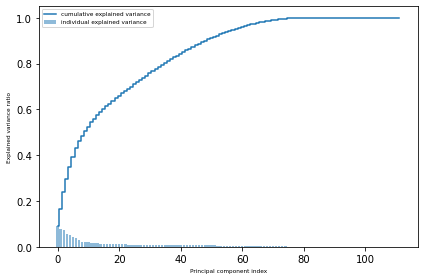

<Figure size 432x288 with 0 Axes>

In [18]:
# 把explained variance(lambda i / lambda和)由大排到小
tot = sum(eigen_vals)
var_exp = np.array([(i / tot) for i in sorted(eigen_vals, reverse=True)])
cum_var_exp = np.cumsum(var_exp) # 計算解釋變異數

# 繪圖
plt.bar(range(len(eigen_vals)), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(len(eigen_vals)), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio', fontsize = 'xx-small')
plt.xlabel('Principal component index', fontsize = 'xx-small')
plt.legend(loc='upper left', fontsize = 'xx-small')
plt.tight_layout()
plt.show()
plt.savefig('output_HW/05_02.png', dpi=400)

從圖形可以發現降維降到60維，比率已經占0.9。因此我的pipeline包含將dataset降到60維的步驟。接著我將GridSearch應用到支援向量機上以挑選超參數，並嘗試四種kernel。

In [19]:
pipe_svc = make_pipeline(StandardScaler(), 
                         PCA(n_components=60),
                         SVC(random_state=1))

# 超參數挑選範圍
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0] 
param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']},
              {'svc__C': param_range, 
               'svc__gamma': param_range,
               'svc__degree': [2,3,4],
               'svc__kernel': ['poly']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['sigmoid']}]

# 使用網格搜尋法
gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)

# 輸出結果
print(gs.best_score_) # 最佳的正確率
print(gs.best_params_) # 最佳參數組合

1.0
{'svc__C': 1.0, 'svc__kernel': 'linear'}


In [20]:
clf = gs.best_estimator_ # 取得剛剛算出的最佳參數
clf.fit(X_train, y_train) # 用這個參數train出model
print('Test accuracy: %.3f' % clf.score(X_test, y_test)) # 對測試集進行預測

Test accuracy: 1.000


## 3. KNN
我仿照SVM的過程對KNN執行GridSearchCV。

In [36]:
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

knn = KNeighborsClassifier(metric='minkowski')

# 超參數挑選範圍
p_range = [1, 2, 3]
nb_range = [3, 5, 7, 9]
param_grid = [{'p': p_range, 
               'n_neighbors': nb_range, 
               'weights': ['uniform']},
              {'p': p_range, 
               'n_neighbors': nb_range, 
               'weights': ['distance']}]

# 使用網格搜尋法
gs = GridSearchCV(estimator=knn, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train_pca, y_train)

# 輸出結果
print(gs.best_score_) # 最佳的正確率
print(gs.best_params_) # 最佳參數組合

1.0
{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


In [37]:
clf = gs.best_estimator_ # 取得剛剛算出的最佳參數
clf.fit(X_train_pca, y_train) # 用這個參數train出model
print('Test accuracy: %.3f' % clf.score(X_test_pca, y_test)) # 對測試集進行預測

Test accuracy: 1.000
